In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
hitpos = np.loadtxt('5e7_1e-31_0.02_hitpos_sphere.txt')

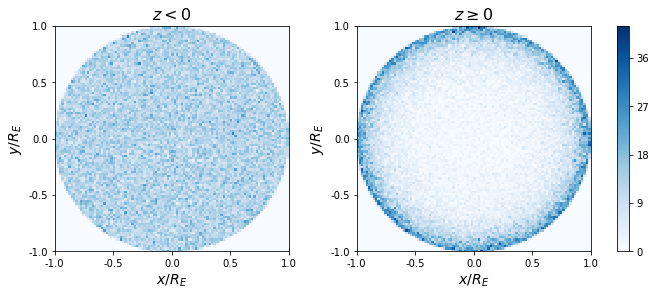

In [3]:
Earth_radius = 6371.

fig, ax = plt.subplots(1,2,figsize=(9,4),constrained_layout=True)

selection = hitpos[:,2]<0
im0 = ax[0].hist2d(hitpos[:,0][hitpos[:,2]<0]/Earth_radius,hitpos[:,1][hitpos[:,2]<0]/Earth_radius
           ,bins=100,rasterized=True,cmap='Blues')
ax[0].set_title(r'$z<0$',size=16)
im1 = ax[1].hist2d(hitpos[:,0][hitpos[:,2]>0]/Earth_radius,hitpos[:,1][hitpos[:,2]>0]/Earth_radius
                 ,bins=100,rasterized=True,cmap='Blues')
ax[1].set_title(r'$z\geq0$',size=16)

### set norm ###
vmin = min(im0[0].min(),im1[0].min())
vmax = max(im0[0].max(),im1[0].max())
norm = colors.Normalize(vmin=vmin,vmax=vmax)

im0[-1].set_norm(norm)
im1[-1].set_norm(norm)

ax[0].set_ylabel(r'$y/R_{E}$',size=14)
ax[1].set_ylabel(r'$y/R_{E}$',size=14)
ax[0].set_xlabel(r'$x/R_{E}$',size=14)
ax[1].set_xlabel(r'$x/R_{E}$',size=14)
for i in range(0,2):
    ax[i].set_xticks([-1,-0.5,0,0.5,1])
    ax[i].set_xticklabels([-1.0,-0.5,0.0,0.5,1.0])
    ax[i].set_yticks([-1,-0.5,0,0.5,1])
    ax[i].set_yticklabels([-1.0,-0.5,0.0,0.5,1.0])

cb0 = fig.colorbar(im1[-1],ax=[ax[0],ax[1]],anchor=(0.5,1),aspect=40,ticks=[0,9,18,27,36,45])


plt.savefig('xy.pdf')
plt.savefig('xy.png')
plt.show()